# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [23]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [24]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
#para calcular la longitud use str.len()
df['title_length'] = df['title'].str.len()

In [25]:
# Calcula media, mediana y moda de la columna 'title_length'
#utilice mean , median y mode para calcular columnas 
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_std = df['title_length'].std()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_std}")

Media: 15.481103166496425
Mediana: 14.0
Moda: 12
Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [26]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_std = df['title_length'].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_std}")

Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [27]:
# Calcula asimetría y curtosis de la columna 'title_length'
#utilice skew para calcular la asimetria y kurtosis para calcular la curtosis
asimetria = skew(df['title_length'])
curtosis = kurtosis(df['title_length'])

print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis}")

Asimetría: 1.5229143965677572
Curtosis: 3.7867237597626007


In [28]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_largo = df.loc[df['title_length'].idxmax(), 'title']
titulo_mas_corto = df.loc[df['title_length'].idxmin(), 'title']

print(f"Título más largo: {titulo_mas_largo}")
print(f"Título más corto: {titulo_mas_corto}")

Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Título más corto: M


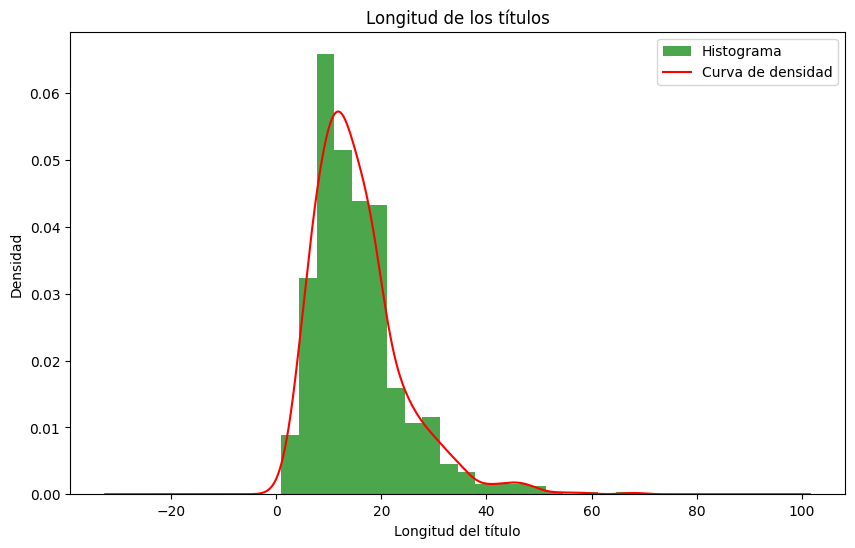

In [29]:
# grafica tus resultados
#utilice kind='hist' para graficar el histograma y 'kde' para graficar la curva de densidad
#utilice label histogtrama para asignar una etiqueta
#utilice plot para graficar la curva
plt.figure(figsize=(10, 6))
df['title_length'].plot(kind='hist', bins=20, alpha=0.7, color='green', density=True, label='Histograma')
df['title_length'].plot(kind='kde', color='red', label='Curva de densidad')
plt.title('Longitud de los títulos')
plt.xlabel('Longitud del título')
plt.ylabel('Densidad')
plt.legend()
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [30]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
#creare la lista con 10 valores aleatorios
data = {'title_length': [10, 13, 14, 18, 22, 25, 30, 35, 40, 45]}
df = pd.DataFrame(data)
#seleccionare 5 valores aleatorios
valores = df['title_length'].sample(5).tolist()

print(valores)

[35, 18, 40, 25, 45]


In [31]:
# Calcula la media de los 5 valores
media = sum(valores) / len(valores)
print(f"Media: {media}")

Media: 32.6


In [32]:
# Calcula las diferencias al cuadrado con respecto a la media
# x - media calcula la diferencia entre cada valor x y la media
# ** 2 eleva al cuadrado la diferencia
diferencias_cuadradas = [(x - media) ** 2 for x in valores]
print(f"Diferencias al cuadrado: {diferencias_cuadradas}")

Diferencias al cuadrado: [5.759999999999994, 213.16000000000005, 54.75999999999998, 57.76000000000002, 153.75999999999996]


In [33]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = sum(diferencias_cuadradas) / len(valores)
print(f"Varianza: {varianza}")

desviacion_manual = varianza ** 0.5
print(f"Desviación estándar: {desviacion_manual}")

Varianza: 97.04
Desviación estándar: 9.850888284819801
